1. Importing the Necessary Libraries and Modules

In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import joblib as jb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

2 . Importing the Dataset

In [105]:
dataset = pd.read_csv("./insurance_dataset.csv")
dataset

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307670
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899220
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476300
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029840
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309840
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,male,46.67,2,no,northeast,High blood pressure,NaN,Frequently,Student,Basic,11584.134900
999996,33,male,36.83,2,no,northeast,NaN,High blood pressure,Frequently,Unemployed,Basic,9834.871456
999997,39,male,39.84,0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.632860
999998,37,female,45.06,4,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618730


3 . Getting the Information about Dataset

In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         749238 non-null   object 
 7   family_medical_history  749596 non-null   object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


4. Getting the Statistics of the Dataset

In [107]:
dataset.describe()

,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372377
50%,41.000000,34.000000,2.000000,16622.127975
75%,53.000000,41.990000,4.000000,19781.465407
max,65.000000,50.000000,5.000000,32561.560370


5. Analysis of NULL Values

In [108]:
dataset.isnull().sum()

age                            0
gender                         0
bmi                            0
children                       0
smoker                         0
region                         0
medical_history           250762
family_medical_history    250404
exercise_frequency             0
occupation                     0
coverage_level                 0
charges                        0
dtype: int64

6. Filling the NULL Values

In [109]:
dataset["medical_history"] = dataset["medical_history"].fillna("No Diease")
dataset["family_medical_history"] = dataset["family_medical_history"].fillna("No History")

7. Visulizing the Data

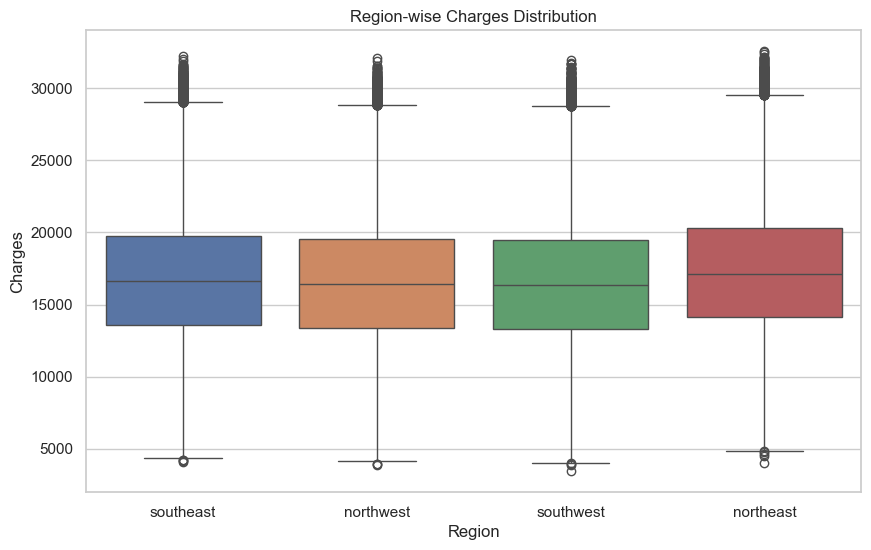

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="region", y="charges", data=dataset, hue="region")
plt.title("Region-wise Charges Distribution")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

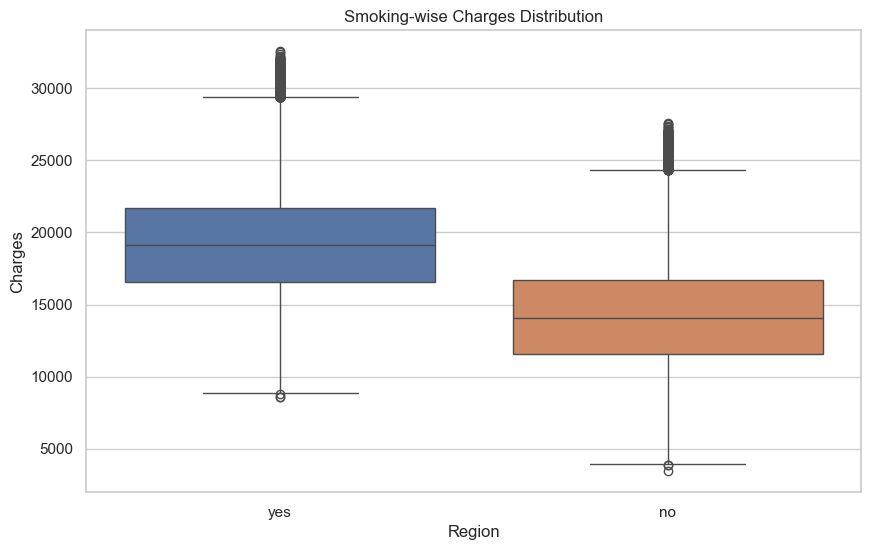

In [111]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="smoker", y="charges", data=dataset, hue="smoker")
plt.title("Smoking-wise Charges Distribution")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

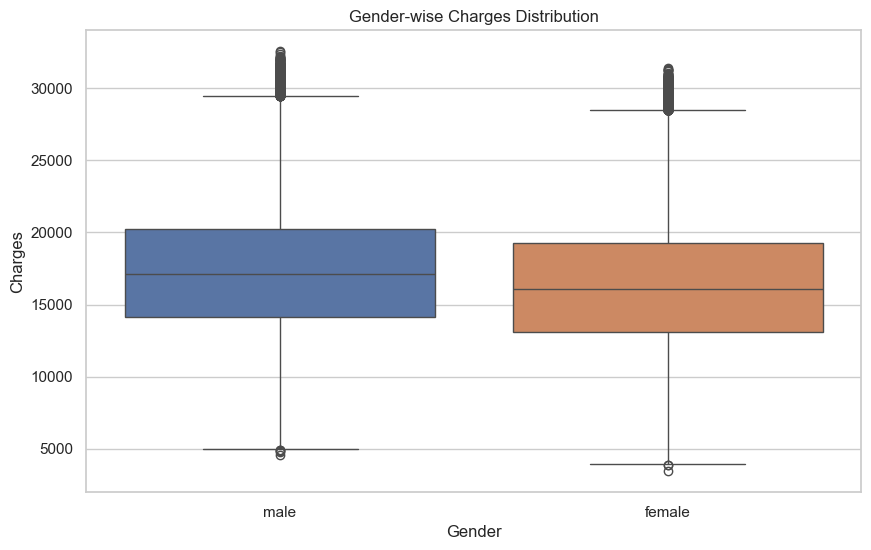

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="gender", y="charges", data=dataset, hue="gender")
plt.title("Gender-wise Charges Distribution")
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()

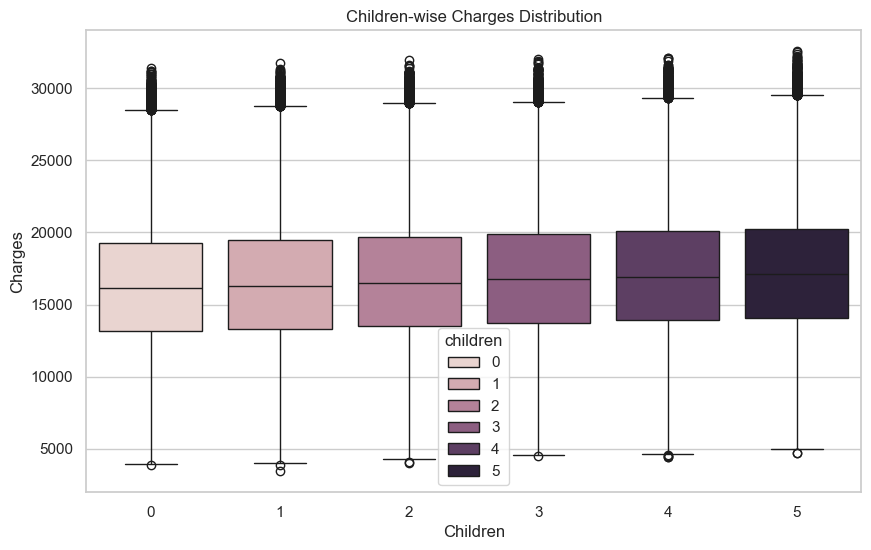

In [113]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="children", y="charges", data=dataset, hue="children")
plt.title("Children-wise Charges Distribution")
plt.xlabel("Children")
plt.ylabel("Charges")
plt.show()

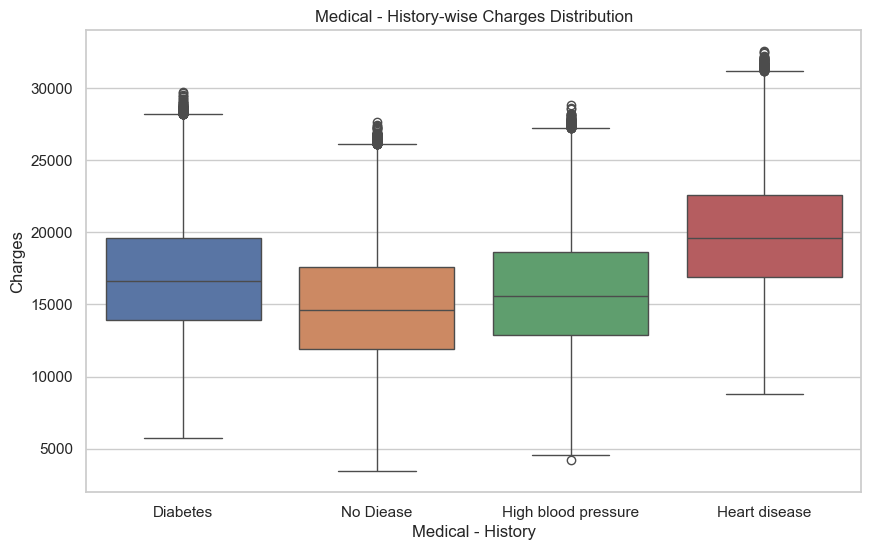

In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="medical_history", y="charges", data=dataset, hue="medical_history")
plt.title("Medical - History-wise Charges Distribution")
plt.xlabel("Medical - History")
plt.ylabel("Charges")
plt.show()

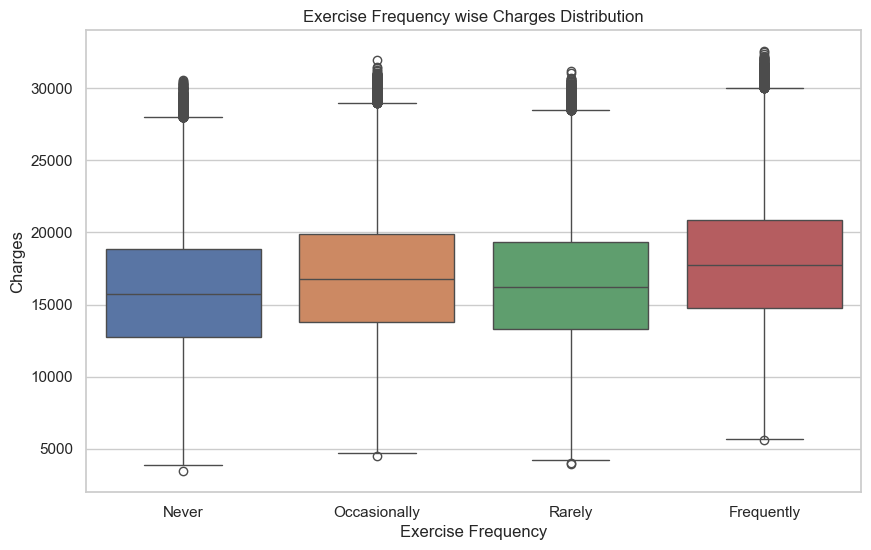

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="exercise_frequency", y="charges", data=dataset, hue="exercise_frequency")
plt.title("Exercise Frequency wise Charges Distribution")
plt.xlabel("Exercise Frequency")
plt.ylabel("Charges")
plt.show()

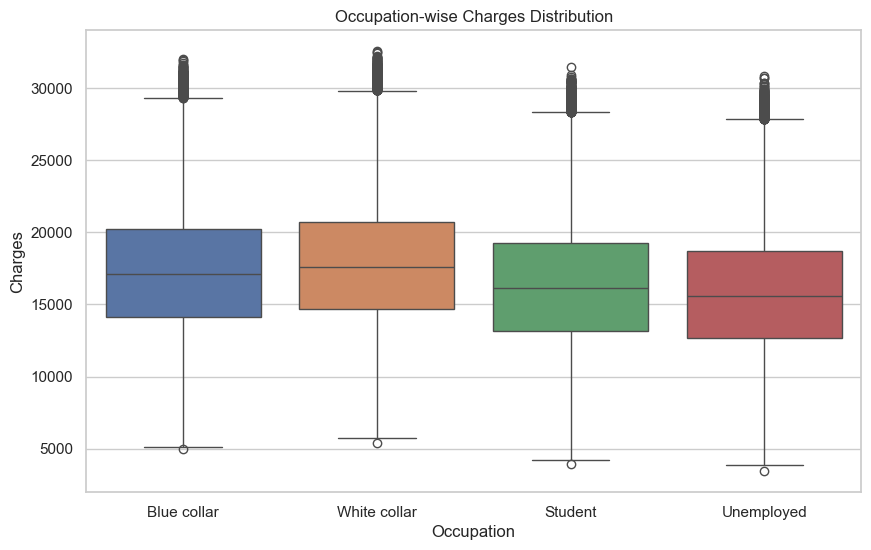

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="occupation", y="charges", data=dataset, hue="occupation")
plt.title("Occupation-wise Charges Distribution")
plt.xlabel("Occupation")
plt.ylabel("Charges")
plt.show()

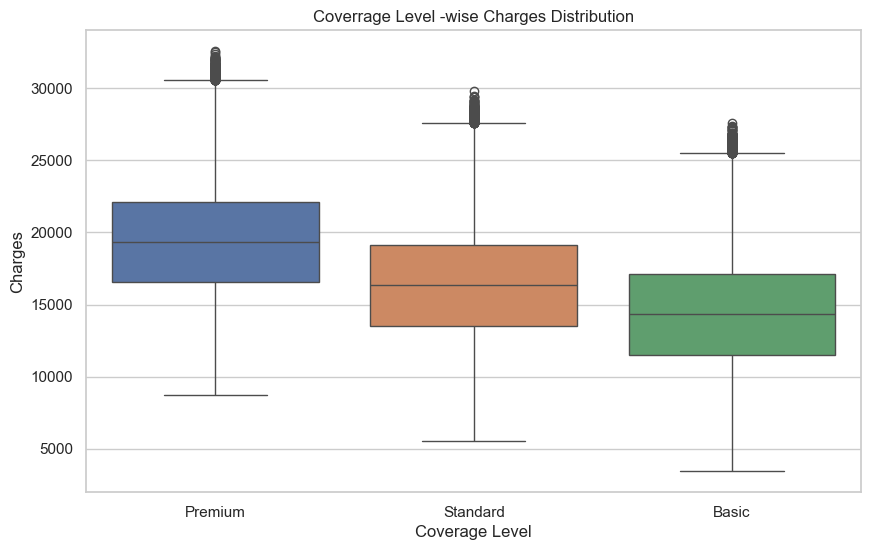

In [117]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="coverage_level", y="charges", data=dataset, hue="coverage_level")
plt.title("Coverrage Level -wise Charges Distribution")
plt.xlabel("Coverage Level")
plt.ylabel("Charges")
plt.show()

8. Data Cleaning

In [118]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [119]:
Outlier_romove = [
    "children",
    "smoker",
    "region",
    "medical_history",
    "family_medical_history",
    "exercise_frequency",
    "coverage_level",
]

for o in Outlier_romove:
    dataset = (
        dataset.groupby(o)
        .apply(lambda x: remove_outliers(x, "charges"))
        .reset_index(drop=True)
    )

C:\Users\Aaryan\AppData\Local\Temp\ipykernel_11292\3404971429.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: remove_outliers(x, "charges"))
C:\Users\Aaryan\AppData\Local\Temp\ipykernel_11292\3404971429.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: remove_outliers(x, "charges"))
C:\Users\Aaryan\AppData\Local\Temp\ipykernel_11292\3404971429.py:14: DeprecationWarn

9. Feature Scaling

In [120]:
needs_to_be_scaled = ["age", "bmi", "children"]
pareameter = {}

for feature in needs_to_be_scaled:
    scaler = StandardScaler()
    dataset[feature] = scaler.fit_transform(dataset[[feature]])
    jb.dump(scaler, f"{feature}.pkl")

10. Binary Class Encoding

In [121]:
binary_class_feature = ["smoker", "gender"]

for feature in binary_class_feature:
    encoder = LabelEncoder()
    dataset[feature] = encoder.fit_transform(dataset[[feature]])
    jb.dump(scaler, f"{feature}.pkl")

c:\Users\Aaryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Aaryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11. Multiclass Classification

In [124]:
multi_class_feature = [
    "region",
    "medical_history",
    "family_medical_history",
    "exercise_frequency",
    "occupation",
    "coverage_level",
]

for feature in multi_class_feature:
    encoder = OneHotEncoder(sparse_output=False)
    encoded_feature = encoder.fit_transform(dataset[[feature]])
    dataset = dataset.drop(columns=[feature])
    encoded_df = pd.DataFrame(
        encoded_feature, columns=encoder.get_feature_names_out([feature])
    )
    dataset = pd.concat([dataset, encoded_df], axis=1)
    jb.dump(encoder, f"{feature}.pkl")

12. Spliting the dataset into Dependent and Independent Feature

In [126]:
X = dataset.drop("charges", axis="columns")
Y = pd.DataFrame(dataset["charges"])

13. Spliting the dataset into train and test dataset

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

14. Spliting the dataset into train and test dataset

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=103
)

15. Creating the Model

In [129]:
model = LinearRegression()
model

LinearRegression()

16. Training the model

In [130]:
model.fit(X_train,Y_train)

LinearRegression()

17. Predicting the Train Dataset Charges

In [131]:
y_predicted = model.predict(X_train)

18. Predicting the Test Dataset Charges

In [132]:
y_predicted_test = model.predict(X_test)

19. Finding the Error of Train Dataset

In [133]:
train_error_r2 = r2_score(y_true=Y_train, y_pred=y_predicted)
train_error_mse = mean_squared_error(y_true=Y_train, y_pred=y_predicted)
print(f"Train Error :-\nMean Square Error :- {train_error_mse}\nR2 Score :- {train_error_r2}")

Train Error :-
Mean Square Error :- 83320.77667017448
R2 Score :- 0.9955676817911884


20. Finding the Error of Test Dataset

In [134]:
test_error_r2 = r2_score(y_true=Y_test, y_pred=y_predicted_test)
test_error_mse = mean_squared_error(y_true=Y_test, y_pred=y_predicted_test)
print(f"Test Error :-\nMean Square Error :- {test_error_mse}\nR2 Score :- {test_error_r2}")

Test Error :-
Mean Square Error :- 83377.85523643692
R2 Score :- 0.9955686800257072
